The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# Dataset acquisition

In [43]:
# !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
# !unzip bank+marketing.zip && rm bank+marketing.zip
# !unzip bank-additional.zip && rm bank-additional.zip
# !unzip bank.zip && rm bank.zip

# Data preparation

In [44]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [45]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [46]:
df = df[['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome', 'y']]
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [47]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [48]:
df.isnull().sum() # no missing values in the dataset

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Question 1
What is the most frequent observation (mode) for the column education?

In [49]:
df.education.mode()

0    secondary
Name: education, dtype: object

In [50]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

# Question 2: Feature importance - correlation
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- age and balance
- day and campaign
- day and pdays
- pdays and previous -> has the highest correlation (0.45)

In [51]:
df.dtypes[df.dtypes != 'object']

age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

In [52]:
df.dtypes[df.dtypes != 'object'].index.to_list()

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [53]:
corr = df.corr(numeric_only=True)
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

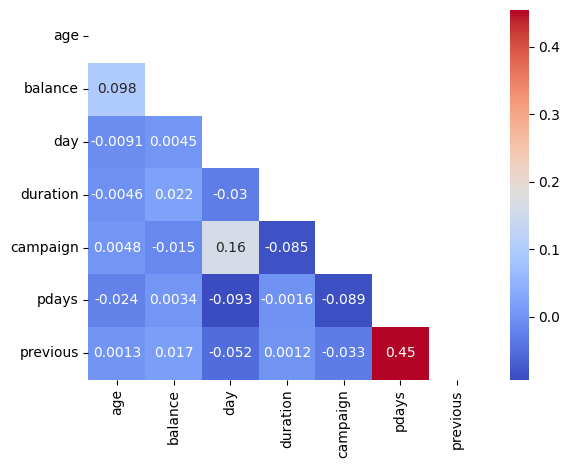

In [54]:
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm')

## Target encoding
Now we want to encode the y variable

Let's replace the values yes/no with 1/0

In [55]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [56]:
df.y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [57]:
df.y = (df.y == 'yes').astype(int)
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

## Split the data
Split your data in train/val/test sets with 60%/20%/20% distribution

Use Scikit-Learn for that (the train_test_split function) and set the seed to 42

Make sure that the target value y is not in your dataframe.

In [58]:
seed = 42
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
len(df_full_train), len(df_test)

(36168, 9043)

In [59]:
val_size = 20/80
val_size

0.25

In [60]:
df_train, df_val = train_test_split(df_full_train, test_size=val_size, random_state=seed)
len(df_train), len(df_val)

(27126, 9042)

In [61]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [62]:
assert (len(df_train) + len(df_val) +len(df_test)) == len(df)

In [63]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [64]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [65]:
# delete to avoid using it as a feature by mistake - to avoid data leakage and overfitting
del df_train['y']
del df_val['y']
del df_test['y']

In [66]:
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown


# Question 3: Feature importance - mutual information
Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.

Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?

- contact
- education
- housing
- poutcome -> highest (0.03)

In [67]:
def mutual_info_y_score(series):
    return mutual_info_score(series, y_train).round(2)

In [68]:
categorical = df.dtypes[df.dtypes == 'object'].index.to_list()
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [69]:
mutual_info = df_train[categorical].apply(mutual_info_y_score)
mutual_info.sort_values(ascending=False).to_frame(name='feature_importance')

,feature_importance
month,0.03
poutcome,0.03
job,0.01
housing,0.01
contact,0.01
marital,0.00
education,0.00


# Question 4: Logistic regression model
Now let's train a logistic regression.

Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.

Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9

## One-hot encoding

In [70]:
train_dicts = df_train.to_dict(orient='records')
train_dicts[0]

{'age': 32,
 'job': 'technician',
 'marital': 'single',
 'education': 'tertiary',
 'balance': 1100,
 'housing': 'yes',
 'contact': 'cellular',
 'day': 11,
 'month': 'aug',
 'duration': 67,
 'campaign': 1,
 'pdays': -1,
 'previous': 0,
 'poutcome': 'unknown'}

In [71]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train.shape

(27126, 47)

In [72]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [73]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val.shape

(9042, 47)

## Model training

In [74]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(-6), sigmoid(0), sigmoid(6)

(np.float64(0.0024726231566347743),
 np.float64(0.5),
 np.float64(0.9975273768433653))

In [75]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train) 

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

## Model evaluation

In [76]:
y_pred = model.predict(X_val)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
original_accuracy = (y_val == y_pred).mean()
original_accuracy

np.float64(0.9011280690112807)

In [78]:
original_accuracy.round(2)

np.float64(0.9)

# Question 5
Let's find the least useful feature using the feature elimination technique.

Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- age
- balance
- marital
- previous

Note: The difference doesn't have to be positive.

In [79]:
mutual_info = df_train.apply(mutual_info_y_score)
mutual_info.sort_values(ascending=False).to_frame(name='feature_importance')

,feature_importance
balance,0.12
duration,0.10
pdays,0.04
month,0.03
poutcome,0.03
age,0.01
job,0.01
housing,0.01
contact,0.01
day,0.01


In [80]:
def prepare_X(df_train, df_val, feature_to_eliminate=None):
    df_train = df_train.copy()

    if feature_to_eliminate:
        df_train.drop(columns = feature_to_eliminate, inplace=True)
    
    train_dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    print(f"Feature to drop: {feature_to_eliminate}")

    print(train_dicts[0])

    val_dicts = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dicts)

    return X_train, X_val


In [81]:
def feature_elimination(features_to_eliminate):
    results = []
    for feature in features_to_eliminate:
        X_train, X_val = prepare_X(df_train, df_val, feature)

        model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
        model.fit(X_train, y_train) 

        y_pred = model.predict(X_val)

        accuracy = (y_val == y_pred).mean()

        diff = original_accuracy - accuracy
        abs_diff = abs(diff)

        results.append(
            {
                "eliminated_feature": feature,
                "accuracy": accuracy,
                "diff": diff,
                "abs_diff": abs_diff
            }
        )
    results_df = pd.DataFrame(results)
    results_df.sort_values(by='accuracy', ascending=False, inplace=True)
    return results_df.reset_index(drop=True)
        
        

In [82]:
feature_elimination([None, 'age', 'balance', 'marital', 'previous'])

Feature to drop: None
{'age': 32, 'job': 'technician', 'marital': 'single', 'education': 'tertiary', 'balance': 1100, 'housing': 'yes', 'contact': 'cellular', 'day': 11, 'month': 'aug', 'duration': 67, 'campaign': 1, 'pdays': -1, 'previous': 0, 'poutcome': 'unknown'}
Feature to drop: age
{'job': 'technician', 'marital': 'single', 'education': 'tertiary', 'balance': 1100, 'housing': 'yes', 'contact': 'cellular', 'day': 11, 'month': 'aug', 'duration': 67, 'campaign': 1, 'pdays': -1, 'previous': 0, 'poutcome': 'unknown'}
Feature to drop: balance
{'age': 32, 'job': 'technician', 'marital': 'single', 'education': 'tertiary', 'housing': 'yes', 'contact': 'cellular', 'day': 11, 'month': 'aug', 'duration': 67, 'campaign': 1, 'pdays': -1, 'previous': 0, 'poutcome': 'unknown'}
Feature to drop: marital
{'age': 32, 'job': 'technician', 'education': 'tertiary', 'balance': 1100, 'housing': 'yes', 'contact': 'cellular', 'day': 11, 'month': 'aug', 'duration': 67, 'campaign': 1, 'pdays': -1, 'previous'

,eliminated_feature,accuracy,diff,abs_diff
0,balance,0.901349,-0.000221,0.000221
1,None,0.901128,0.000000,0.000000
2,previous,0.901128,0.000000,0.000000
3,marital,0.901017,0.000111,0.000111
4,age,0.900796,0.000332,0.000332


# Question 6
Now let's train a regularized logistic regression.

Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].

Train models using all the features as in Q4.

Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

Note: If there are multiple options, select the smallest C.

In [83]:
def regularized_logistic_regression():
    C = [0.01, 0.1, 1, 10, 100]

    results = []

    for param in C:
        model = LogisticRegression(solver='liblinear', C=param, max_iter=1000, random_state=42)
        model.fit(X_train, y_train) 

        y_pred = model.predict(X_val)

        accuracy = (y_val == y_pred).mean().round(3)

        results.append(
            {
                "C": param,
                "accuracy": accuracy,
            }
        )
    results_df = pd.DataFrame(results)
    results_df.sort_values(by='accuracy', ascending=False, inplace=True)
    return results_df

In [84]:
regularized_logistic_regression()

,C,accuracy
4,100.00,0.902
1,0.10,0.901
2,1.00,0.901
3,10.00,0.899
0,0.01,0.898
